In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
data = pd.read_csv(r"C:\Users\revan\Downloads\phone_usage_india.csv")

In [31]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
  User ID  Age  Gender   Location Phone Brand       OS  Screen Time (hrs/day)  \
0  U00001   53    Male     Mumbai        Vivo  Android                    3.7   
1  U00002   60   Other      Delhi      Realme      iOS                    9.2   
2  U00003   37  Female  Ahmedabad       Nokia  Android                    4.5   
3  U00004   32    Male       Pune     Samsung  Android                   11.0   
4  U00005   16    Male     Mumbai      Xiaomi      iOS                    2.2   

   Data Usage (GB/month)  Calls Duration (mins/day)  Number of Apps Installed  \
0                   23.9                       37.9                       104   
1                   28.1                       13.7                       169   
2                   12.3                       66.8                        96   
3                   25.6                      156.2                       146   
4                    2.5                      236.2                        86   

   Social

In [7]:
data.tail()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
17681,U17682,27,Other,Mumbai,Apple,iOS,7.2,36.6,90.4,81,5.1,4007,3.8,3.3,1380,Entertainment
17682,U17683,40,Female,Chennai,Oppo,iOS,9.5,12.9,243.0,166,4.3,8550,3.4,0.7,222,Education
17683,U17684,34,Female,Ahmedabad,Realme,Android,1.1,48.9,74.7,70,5.3,5516,0.7,4.0,1612,Entertainment
17684,U17685,22,Male,Hyderabad,Vivo,Android,8.8,25.6,105.6,96,2.4,3614,6.6,0.8,1528,Work
17685,U17686,43,Other,Kolkata,Oppo,iOS,5.6,22.5,215.2,78,5.1,5332,0.8,3.6,1098,Gaming


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       17686 non-null  object 
 1   Age                           17686 non-null  int64  
 2   Gender                        17686 non-null  object 
 3   Location                      17686 non-null  object 
 4   Phone Brand                   17686 non-null  object 
 5   OS                            17686 non-null  object 
 6   Screen Time (hrs/day)         17686 non-null  float64
 7   Data Usage (GB/month)         17686 non-null  float64
 8   Calls Duration (mins/day)     17686 non-null  float64
 9   Number of Apps Installed      17686 non-null  int64  
 10  Social Media Time (hrs/day)   17686 non-null  float64
 11  E-commerce Spend (INR/month)  17686 non-null  int64  
 12  Streaming Time (hrs/day)      17686 non-null  float64
 13  G

In [11]:
data.shape

(17686, 16)

In [13]:
data.describe()

,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
count,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000
mean,37.584247,6.546376,25.411257,151.405846,104.584869,3.252369,5075.707848,4.250616,2.490874,1042.785367
std,13.338252,3.172677,14.122167,84.923353,55.217097,1.590223,2871.604841,2.155683,1.446003,552.502067
min,15.000000,1.000000,1.000000,5.000000,10.000000,0.500000,100.000000,0.500000,0.000000,100.000000
25%,26.000000,3.800000,13.200000,77.325000,57.000000,1.900000,2587.500000,2.400000,1.200000,561.000000
50%,38.000000,6.600000,25.300000,150.600000,104.000000,3.200000,5052.000000,4.200000,2.500000,1040.000000
75%,49.000000,9.300000,37.600000,223.900000,152.000000,4.600000,7606.000000,6.100000,3.700000,1521.750000
max,60.000000,12.000000,50.000000,300.000000,200.000000,6.000000,10000.000000,8.000000,5.000000,2000.000000


In [15]:
data.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Phone Brand', 'OS',
       'Screen Time (hrs/day)', 'Data Usage (GB/month)',
       'Calls Duration (mins/day)', 'Number of Apps Installed',
       'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
       'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
       'Monthly Recharge Cost (INR)', 'Primary Use'],
      dtype='object')

In [17]:
data["Age"].value_counts()

Age
58    438
54    423
19    418
36    411
46    410
50    407
47    403
22    402
40    401
16    400
28    397
52    397
24    396
15    396
48    392
41    390
35    390
59    390
21    388
57    387
30    386
25    385
56    385
51    383
37    379
39    378
49    378
55    377
23    376
34    375
31    375
53    375
44    375
33    374
26    371
20    370
17    368
32    367
45    366
29    365
27    365
60    359
18    359
42    356
38    356
43    347
Name: count, dtype: int64

In [19]:
data.isna().sum()

User ID                         0
Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64

In [33]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
User ID                         0
Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64


In [35]:
# Data summary
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       17686 non-null  object 
 1   Age                           17686 non-null  int64  
 2   Gender                        17686 non-null  object 
 3   Location                      17686 non-null  object 
 4   Phone Brand                   17686 non-null  object 
 5   OS                            17686 non-null  object 
 6   Screen Time (hrs/day)         17686 non-null  float64
 7   Data Usage (GB/month)         17686 non-null  float64
 8   Calls Duration (mins/day)     17686 non-null  float64
 9   Number of Apps Installed      17686 non-null  int64  
 10  Social Media Time (hrs/day)   17686 non-null  float64
 11  E-commerce Spend (INR/month)  17686 non-null  int64  
 12  Streaming Time (hrs/day)      17686 no

In [37]:
# Preprocessing
# Handle missing values (if any)
data = data.dropna()

In [39]:
# Encoding categorical variables (if any exist)
data_encoded = pd.get_dummies(data, drop_first=True)

In [41]:
# Splitting features and target variable
# Assuming the last column is the target
X = data_encoded.iloc[:, :-1]
y = data_encoded.iloc[:, -1]

In [43]:

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [47]:
# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)

In [51]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [53]:
print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Model Accuracy: 0.8029960429621255

Confusion Matrix:
[[2510  348]
 [ 349  331]]

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.88      0.88      2858
        True       0.49      0.49      0.49       680

    accuracy                           0.80      3538
   macro avg       0.68      0.68      0.68      3538
weighted avg       0.80      0.80      0.80      3538



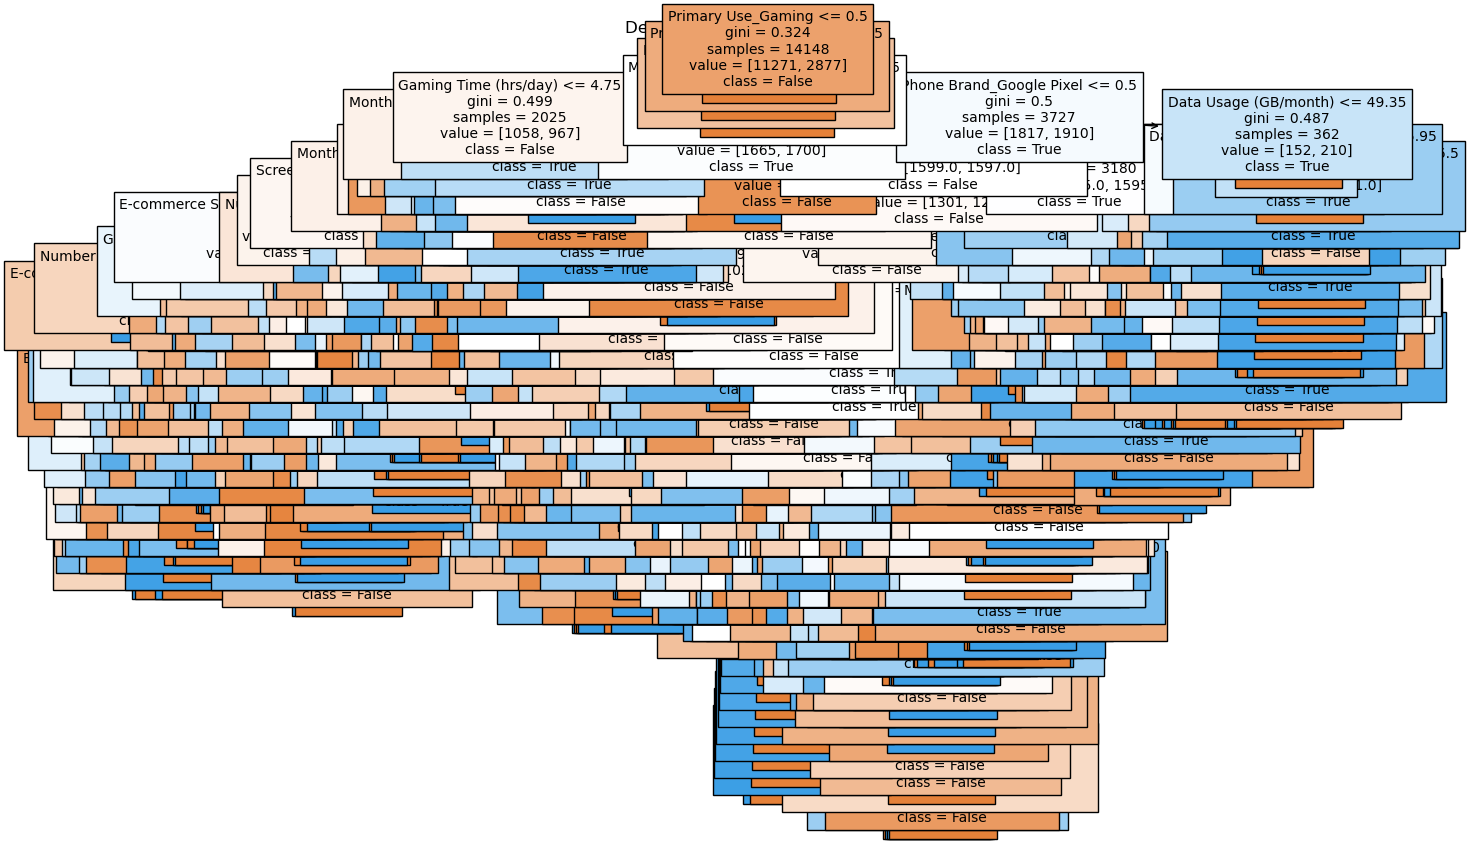

In [56]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=y.unique().astype(str), filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [58]:
pre_value =data['Gender'].value_counts()
pre_value

Gender
Female    5969
Other     5892
Male      5825
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

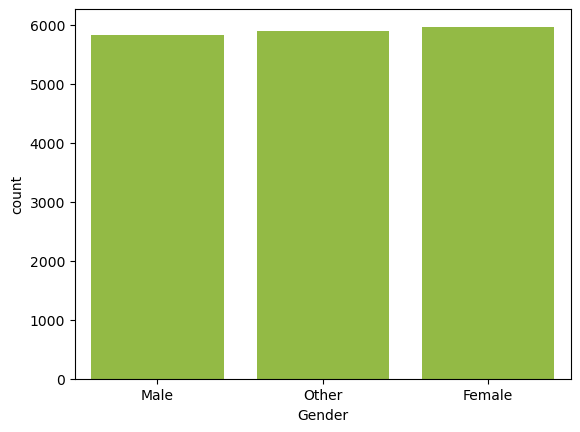

In [60]:
sns.countplot(data,x='Gender',color='yellowgreen')

<Axes: xlabel='Gender', ylabel='Count'>

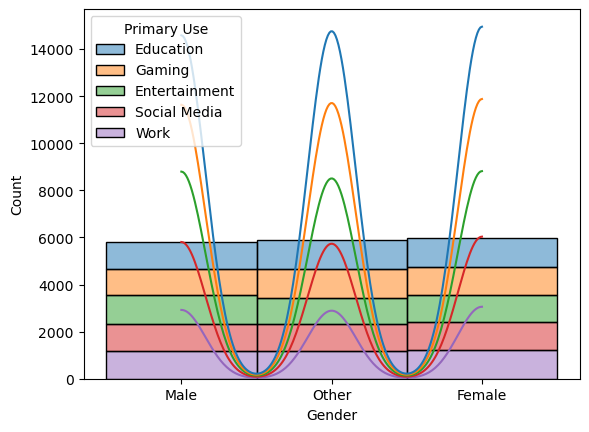

In [64]:
sns.histplot(data, x="Gender", hue="Primary Use", multiple="stack",bins = 50, kde=True)

In [66]:
#model building

In [68]:
#split dataset in features and target variable

X = data.drop(['Primary Use'], axis=1) #indepentent varibale

y = data['Primary Use']  # depentent variable

In [74]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [76]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((11849, 15), (5837, 15))

In [78]:
# check data types in X_train

X_train.dtypes

User ID                          object
Age                               int64
Gender                           object
Location                         object
Phone Brand                      object
OS                               object
Screen Time (hrs/day)           float64
Data Usage (GB/month)           float64
Calls Duration (mins/day)       float64
Number of Apps Installed          int64
Social Media Time (hrs/day)     float64
E-commerce Spend (INR/month)      int64
Streaming Time (hrs/day)        float64
Gaming Time (hrs/day)           float64
Monthly Recharge Cost (INR)       int64
dtype: object